Program 3:
Train a custom Word2Vec model on a small dataset. Train embeddings on a domain-specific corpus (e.g., legal, medical) and analyze how embeddings capture domain-specific semantics.

Training Word2Vec model...
Model training complete!


c:\Users\bened\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


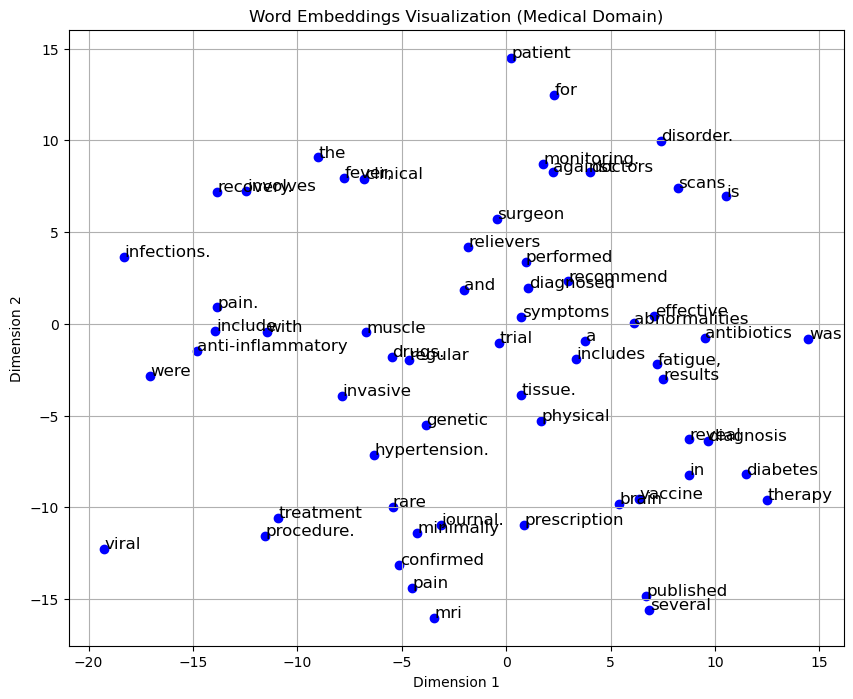


Words similar to 'treatment':
  procedure. (0.27)
  confirmed (0.15)
  muscle (0.13)
  monitoring. (0.12)
  fatigue, (0.12)

Words similar to 'vaccine':
  brain (0.26)
  recommend (0.21)
  procedure. (0.19)
  therapy (0.19)
  in (0.18)


In [1]:
# Import libraries
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Sample domain-specific corpus (medical domain)
medical_corpus = [
    "The patient was diagnosed with diabetes and hypertension.",
    "MRI scans reveal abnormalities in the brain tissue.",
    "The treatment involves antibiotics and regular monitoring.",
    "Symptoms include fever, fatigue, and muscle pain.",
    "The vaccine is effective against several viral infections.",
    "Doctors recommend physical therapy for recovery.",
    "The clinical trial results were published in the journal.",
    "The surgeon performed a minimally invasive procedure.",
    "The prescription includes pain relievers and anti-inflammatory drugs.",
    "The diagnosis confirmed a rare genetic disorder."
]

# Preprocess corpus (simple tokenization)
processed_corpus = [sentence.lower().split() for sentence in medical_corpus]

# Train Word2Vec model
print("Training Word2Vec model...")
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=50)
print("Model training complete!")

# Extract word vectors
words = list(model.wv.index_to_key)
embeddings = np.array([model.wv[word] for word in words])

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

# Visualize embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color="blue")

for i, word in enumerate(words):
    plt.text(tsne_result[i, 0] + 0.02, tsne_result[i, 1] + 0.02, word, fontsize=12)

plt.title("Word Embeddings Visualization (Medical Domain)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

# Function to find similar words
def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.wv.most_similar(input_word, topn=top_n)
        print(f"\nWords similar to '{input_word}':")
        for word, similarity in similar_words:
            print(f"  {word} ({similarity:.2f})")
    except KeyError:
        print(f"'{input_word}' not found in vocabulary.")

# Example queries
find_similar_words("treatment")
find_similar_words("vaccine")
